<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
    
<small>
Massimo Nocentini, PhD.
<br><br>
February 26, 2020: init
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
These slides outline techniques for effectively loading, storing, and manipulating in-memory data in Python.
</div>

In [1]:
__AUTHORS__ = {'am': ("Andrea Marino", 
                      "andrea.marino@unifi.it",),
               'mn': ("Massimo Nocentini", 
                      "massimo.nocentini@unifi.it", 
                      "https://github.com/massimo-nocentini/",)}

__KEYWORDS__ = ['Python', 'numpy', 'numerical', 'data',]

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg"></center>

# Introduction to NumPy

The topic is very broad: datasets can come from a wide range of sources and a wide range of formats, including be collections of documents, collections of images, collections of sound clips, collections of numerical measurements, or nearly anything else.
Despite this apparent heterogeneity, it will help us to think of all data fundamentally as arrays of numbers.

For this reason, efficient storage and manipulation of numerical arrays is absolutely fundamental to the process of doing data science.

NumPy (short for *Numerical Python*) provides an efficient interface to store and operate on dense data buffers.
In some ways, NumPy arrays are like Python's built-in ``list`` type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size.
NumPy arrays form the core of nearly the entire ecosystem of data science tools in Python, so time spent learning to use NumPy effectively will be valuable no matter what aspect of data science interests you.

In [2]:
import numpy
numpy.__version__

'1.18.1'

By convention, you'll find that most people in the SciPy/PyData world will import NumPy using ``np`` as an alias:

In [1]:
import numpy as np

Throughout this chapter, and indeed the rest of the book, you'll find that this is the way we will import and use NumPy.

# Understanding Data Types in Python

Effective data-driven science and computation requires understanding how data is stored and manipulated.

Here we outlines and contrasts how arrays of data are handled in the Python language itself, and how NumPy improves on this.

Python offers several different options for storing data in efficient, fixed-type data buffers.
The built-in ``array`` module (available since Python 3.3) can be used to create dense arrays of a uniform type:

In [5]:
import array
L = list(range(10))
A = array.array('i', L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Here ``'i'`` is a type code indicating the contents are integers.



Much more useful, however, is the ``ndarray`` object of the NumPy package.
While Python's ``array`` object provides efficient storage of array-based data, NumPy adds to this efficient *operations* on that data.

## Creating Arrays from Python Lists

First, we can use ``np.array`` to create arrays from Python lists:

In [10]:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

Remember that unlike Python lists, NumPy is constrained to arrays that all contain the same type.
If types do not match, NumPy will upcast if possible (here, integers are up-cast to floating point):

In [8]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

If we want to explicitly set the data type of the resulting array, we can use the ``dtype`` keyword:

In [9]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

## Creating Arrays from Scratch

Especially for larger arrays, it is more efficient to create arrays from scratch using routines built into NumPy:

In [11]:
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [13]:
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [14]:
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [15]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [16]:
np.random.random((3, 3))

array([[0.49760049, 0.67705904, 0.59093804],
       [0.99268699, 0.42792808, 0.8336333 ],
       [0.44928886, 0.70924885, 0.1681015 ]])

In [17]:
np.random.normal(0, 1, (3, 3))

array([[-0.84044642,  1.54753956, -0.023514  ],
       [ 1.09749938,  0.70455525,  0.57204258],
       [ 0.47691043,  0.89482679, -2.07735954]])

In [18]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## NumPy Standard Data Types

NumPy arrays contain values of a single type, so have a look at those types and their bounds:


| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

# The Basics of NumPy Arrays

Data manipulation in Python is nearly synonymous with NumPy array manipulation: even newer tools like Pandas are built around the NumPy array.

- *Attributes of arrays*: Determining the size, shape, memory consumption, and data types of arrays
- *Indexing of arrays*: Getting and setting the value of individual array elements
- *Slicing of arrays*: Getting and setting smaller subarrays within a larger array
- *Reshaping of arrays*: Changing the shape of a given array
- *Joining and splitting of arrays*: Combining multiple arrays into one, and splitting one array into many

## NumPy Array Attributes

First let's discuss some useful array attributes.
We'll start by defining three random arrays, a one-dimensional, two-dimensional, and three-dimensional array:

In [19]:
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

Each array has attributes ``ndim`` (the number of dimensions), ``shape`` (the size of each dimension), ``size`` (the total size of the array) and ``dtype`` (the data type of the array):

In [21]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
print("dtype:", x3.dtype)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
dtype: int64


## Array Indexing: Accessing Single Elements

In a one-dimensional array, the $i^{th}$ value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists:

In [22]:
x1

array([5, 0, 3, 3, 7, 9])

In [23]:
x1[0]

5

In [25]:
x1[-1] # To index from the end of the array, you can use negative indices.

9

In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices:

In [26]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [27]:
x2[0, 0]

3

In [28]:
x2[2, -1]

7

Values can also be modified using any of the above index notation:

In [29]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

Keep in mind that, unlike Python lists, NumPy arrays have a fixed type.

In [30]:
x1[0] = 3.14159  # this will be truncated!
x1

array([3, 0, 3, 3, 7, 9])

## Array Slicing: Accessing Subarrays

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation, marked by the colon (``:``) character.

The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array ``x``, use this:
``` python
x[start:stop:step]
```
If any of these are unspecified, they default to the values ``start=0``, ``stop=``*``size of dimension``*, ``step=1``.


### One-dimensional subarrays

In [31]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
x[:5]  # first five elements

array([0, 1, 2, 3, 4])

In [33]:
x[5:]  # elements after index 5

array([5, 6, 7, 8, 9])

In [34]:
x[4:7]  # middle sub-array

array([4, 5, 6])

In [35]:
x[::2]  # every other element

array([0, 2, 4, 6, 8])

In [36]:
x[1::2]  # every other element, starting at index 1

array([1, 3, 5, 7, 9])

A potentially confusing case is when the ``step`` value is negative.
In this case, the defaults for ``start`` and ``stop`` are swapped.
This becomes a convenient way to reverse an array:

In [37]:
x[::-1]  # all elements, reversed

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [38]:
x[5::-2]  # reversed every other from index 5

array([5, 3, 1])

### Multi-dimensional subarrays

Multi-dimensional slices work in the same way, with multiple slices separated by commas:

In [39]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [40]:
x2[:2, :3]  # two rows, three columns

array([[12,  5,  2],
       [ 7,  6,  8]])

In [41]:
x2[:3, ::2]  # all rows, every other column

array([[12,  2],
       [ 7,  8],
       [ 1,  7]])

In [42]:
x2[::-1, ::-1]

array([[ 7,  7,  6,  1],
       [ 8,  8,  6,  7],
       [ 4,  2,  5, 12]])

#### Accessing array rows and columns

One commonly needed routine is accessing of single rows or columns of an array:

In [43]:
print(x2[:, 0])  # first column of x2

[12  7  1]


In [44]:
print(x2[0, :])  # first row of x2

[12  5  2  4]


In [45]:
print(x2[0])  # equivalent to x2[0, :]

[12  5  2  4]


### Subarrays as no-copy views

One important–and extremely useful–thing to know about array slices is that they return *views* rather than *copies* of the array data.

This is one area in which NumPy array slicing differs from Python list slicing: in lists, slices will be copies.

In [46]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [47]:
x2_sub = x2[:2, :2]
x2_sub

array([[12,  5],
       [ 7,  6]])

In [49]:
x2_sub[0, 0] = 99 # if we modify this subarray, the original array is changed too
x2

array([[99,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

It is sometimes useful to instead explicitly copy the data within an array or a subarray. This can be most easily done with the ``copy()`` method.

## Reshaping of Arrays

If you want to put the numbers 1 through 9 in a $3 \times 3$ grid:

In [110]:
np.arange(1, 10).reshape((3, 3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [111]:
x = np.array([1, 2, 3])
x.reshape((1, 3)) # row vector via reshape

array([[1, 2, 3]])

In [112]:
x[np.newaxis, :] # row vector via newaxis

array([[1, 2, 3]])

In [113]:
x.reshape((3, 1)) # column vector via reshape

array([[1],
       [2],
       [3]])

In [114]:
x[:, np.newaxis] # column vector via newaxis

array([[1],
       [2],
       [3]])

### Concatenation of arrays

``np.concatenate`` takes a tuple or list of arrays as its first argument:

In [105]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [106]:
z = [99, 99, 99]
np.concatenate([x, y, z])

array([ 1,  2,  3,  3,  2,  1, 99, 99, 99])

In [107]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [108]:
np.concatenate([grid, grid]) # concatenate along the first axis

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [109]:
np.concatenate([grid, grid], axis=1) # concatenate along the second axis (zero-indexed)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

For working with arrays of mixed dimensions, it can be clearer to use the ``np.vstack`` (vertical stack) and ``np.hstack`` (horizontal stack) functions:

In [63]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

np.vstack([x, grid]) # vertically stack the arrays

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [64]:
y = np.array([[99],
              [99]])
np.hstack([grid, y]) # horizontally stack the arrays

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

### Splitting of arrays

The opposite of concatenation is splitting, we can pass a list of indices giving the split points:

In [65]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


In [66]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [67]:
np.vsplit(grid, [2])

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11],
        [12, 13, 14, 15]])]

In [68]:
np.hsplit(grid, [2])

[array([[ 0,  1],
        [ 4,  5],
        [ 8,  9],
        [12, 13]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11],
        [14, 15]])]

# Computation on NumPy Arrays: Universal Functions

`Numpy` provides an easy and flexible interface to optimized computation with arrays of data.

The key to making it fast is to use *vectorized* operations, generally implemented through NumPy's *universal functions* (ufuncs).

## The Slowness of Loops

Python's default implementation (known as CPython) does some operations very slowly, this is in part due to the dynamic, interpreted nature of the language.

The relative sluggishness of Python generally manifests itself in situations where many small operations are being repeated – for instance looping over arrays to operate on each element.



For example, pretend to compute the reciprocal of values contained in a array:

In [69]:
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

If we measure the execution time of this code for a large input, we see that this operation is very slow, perhaps surprisingly so!

In [70]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

2.63 s ± 29.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It takes $2.63$ seconds to compute these million operations and to store the result.

It turns out that the bottleneck here is not the operations themselves, but the type-checking and function dispatches that CPython must do at each cycle of the loop.

If we were working in compiled code instead, this type specification would be known before the code executes and the result could be computed much more efficiently.

## Introducing UFuncs

For many types of operations, NumPy provides a convenient interface into just this kind of compiled routine. 

This is known as a *vectorized* operation.

This can be accomplished by  performing an operation on the array, which will then be applied to each element.

In [72]:
%timeit (1.0 / big_array)

2.97 ms ± 35.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Vectorized operations in NumPy are implemented via *ufuncs*, whose main purpose is to quickly execute repeated operations on values in NumPy arrays.


Ufuncs are extremely flexible – before we saw an operation between a scalar and an array, but we can also operate between two arrays:

In [75]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

And ufunc operations are not limited to one-dimensional arrays–they can also act on multi-dimensional arrays as well:

In [76]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

_Any time you see such a loop in a Python script, you should consider whether it can be replaced with a vectorized expression._

### Array arithmetic

NumPy's ufuncs feel very natural to use because they make use of Python's native arithmetic operators:

In [78]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


In [80]:
-(0.5*x + 1) ** 2 # can be strung together also

array([-1.  , -2.25, -4.  , -6.25])

### Trigonometric functions

`NumPy` provides a large number of useful ufuncs, we'll start by defining an array of angles:

In [81]:
theta = np.linspace(0, np.pi, 3)

In [83]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


### Exponents and logarithms

Another common `NumPy` ufunc are the exponentials (that are useful for maintaining precision with very small inputs)

In [84]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


In [86]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


### Specifying output

For large calculations, it is sometimes useful to be able to specify the array where the result of the calculation will be stored:

In [87]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [88]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


### Outer products

Finally, any ufunc can compute the output of all pairs of two different inputs using the ``outer`` method:

In [89]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

# Aggregations: Min, Max, and Everything In Between


## Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in ``sum`` function:

In [90]:
L = np.random.random(100)
sum(L)

50.461758453195614

In [91]:
np.sum(L)

50.46175845319564

In [92]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

191 ms ± 5.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
554 µs ± 7.02 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Minimum and Maximum

Similarly, Python has built-in ``min`` and ``max`` functions:

In [93]:
min(big_array), max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

In [94]:
np.min(big_array), np.max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

In [95]:
%timeit min(big_array)
%timeit np.min(big_array)

118 ms ± 1.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
656 µs ± 8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [97]:
big_array.min(), big_array.max(), big_array.sum()

(7.071203171893359e-07, 0.9999997207656334, 500216.8034810001)

### Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column:

In [99]:
M = np.random.random((3, 4))
M

array([[0.07452786, 0.41843762, 0.99939192, 0.66974416],
       [0.54717434, 0.82711104, 0.23097044, 0.16283152],
       [0.27950484, 0.58540569, 0.90657413, 0.18671025]])

In [100]:
M.sum() # By default, each NumPy aggregation function works on the whole array

5.888383818472106

In [101]:
M.min(axis=0) # specifying the axis along which the aggregate is computed

array([0.07452786, 0.41843762, 0.23097044, 0.16283152])

In [102]:
M.max(axis=1) # find the maximum value within each row

array([0.99939192, 0.82711104, 0.90657413])

### Other aggregation functions

Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value 

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

# Computation on Arrays: Broadcasting

Another means of vectorizing operations is to use NumPy's *broadcasting* functionality.

Broadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.


## Introducing Broadcasting

Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:

In [2]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed on arrays of different sizes:

In [3]:
a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value ``5`` into the array ``[5, 5, 5]``, and adds the results; the advantage of NumPy's broadcasting is that this duplication of values does not actually take place.

We can similarly extend this to arrays of higher dimensions:

In [4]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [5]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here the one-dimensional array ``a`` is stretched, or broadcast across the second dimension in order to match the shape of ``M``.


More complicated cases can involve broadcasting of both arrays:

In [6]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
a, b

(array([0, 1, 2]),
 array([[0],
        [1],
        [2]]))

In [7]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.


### Centering an array

Imagine you have an array of 10 observations, each of which consists of 3 values, we'll store this in a $10 \times 3$ array:

In [8]:
X = np.random.random((10, 3))

In [9]:
Xmean = X.mean(0)
Xmean

array([0.55965135, 0.52179051, 0.41008518])

In [10]:
X_centered = X - Xmean

In [12]:
X_centered.mean(0) # To double-check, we can check that the centered array has near 0 means.

array([-6.66133815e-17,  3.33066907e-17, -7.77156117e-17])

### Plotting a two-dimensional function

One place that broadcasting is very useful is in displaying images based on two-dimensional functions.
If we want to define a function $z = f(x, y)$, broadcasting can be used to compute the function across the grid:

In [117]:
steps = 500
x = np.linspace(0, 5, steps) # # x and y have 500 steps from 0 to 5
y = np.linspace(0, 5, steps)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

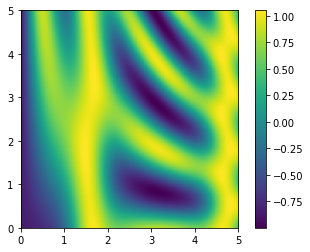

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

# Comparisons, Masks, and Boolean Logic

Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion: for example, you might wish to count all values greater than a certain value, or perhaps remove all outliers that are above some threshold.
In NumPy, Boolean masking is often the most efficient way to accomplish these types of tasks.

## Comparison Operators as ufuncs

In [15]:
x = np.array([1, 2, 3, 4, 5])

In [16]:
x < 3  # less than

array([ True,  True, False, False, False])

In [17]:
x > 3  # greater than

array([False, False, False,  True,  True])

In [18]:
x != 3  # not equal

array([ True,  True, False,  True,  True])

In [19]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

Just as in the case of arithmetic ufuncs, these will work on arrays of any size and shape:

In [20]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [21]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

### Counting entries

To count the number of ``True`` entries in a Boolean array, ``np.count_nonzero`` is useful:

In [22]:
np.count_nonzero(x < 6) # how many values less than 6?

8

In [23]:
np.sum(x < 6)

8

In [24]:
np.sum(x < 6, axis=1) # how many values less than 6 in each row?

array([4, 2, 2])

In [26]:
np.any(x > 8) # are there any values greater than 8?

True

In [25]:
np.any(x < 0) # are there any values less than zero?

False

In [27]:
np.all(x < 10) # are all values less than 10?

True

In [28]:
np.all(x < 8, axis=1) # are all values in each row less than 8?

array([ True, False,  True])

## Boolean Arrays as Masks

A more powerful pattern is to use Boolean arrays as masks, to select particular subsets of the data themselves:

In [29]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [30]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [31]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

What is returned is a one-dimensional array filled with all the values that meet this condition; in other words, all the values in positions at which the mask array is ``True``.


# Fancy Indexing

We saw how to access and modify portions of arrays using simple indices (e.g., ``arr[0]``), slices (e.g., ``arr[:5]``), and Boolean masks (e.g., ``arr[arr > 0]``).

We'll look at another style of array indexing, known as *fancy indexing*, that is like the simple indexing we've already seen, but we pass arrays of indices in place of single scalars.

Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once:

In [32]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [33]:
[x[3], x[7], x[2]] # Suppose we want to access three different elements.

[71, 86, 14]

In [34]:
ind = [3, 7, 4]
x[ind] # Alternatively, we can pass a single list or array of indices

array([71, 86, 60])

When using fancy indexing, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed:

In [35]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

Fancy indexing also works in multiple dimensions:

In [36]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Like with standard indexing, the first index refers to the row, and the second to the column:

In [37]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

The pairing of indices in fancy indexing follows all the broadcasting rules that we've already seen:

In [38]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

each row value is matched with each column vector, exactly as we saw in broadcasting of arithmetic operations

In [39]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

Remember: _with fancy indexing that the return value reflects the **broadcasted shape of the indices**, rather than the shape of the array being indexed_.

## Combined Indexing

For even more powerful operations, fancy indexing can be combined with the other indexing schemes we've seen:

In [41]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [42]:
X[2, [2, 0, 1]] # combine fancy and simple indices

array([10,  8,  9])

In [43]:
X[1:, [2, 0, 1]] # combine fancy indexing with slicing

array([[ 6,  4,  5],
       [10,  8,  9]])

In [44]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask] # combine fancy indexing with masking

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Example: Selecting Random Points

One common use of fancy indexing is the selection of subsets of rows from a matrix.

For example, we might have an $N$ by $D$ matrix representing $N$ points in $D$ dimensions, such as the following points drawn from a two-dimensional normal distribution:

In [119]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

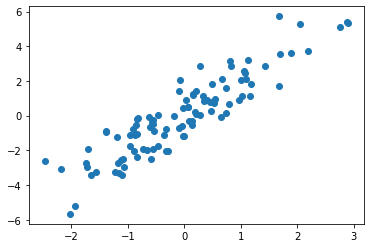

In [120]:
plt.scatter(X[:, 0], X[:, 1]);

Let's use fancy indexing to select 20 random points. We'll do this by first choosing 20 random indices with no repeats, and use these indices to select a portion of the original array:

In [48]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([22, 56, 83, 30, 58, 32, 78, 14, 36, 33,  8, 98, 25,  6, 41, 84, 13,
       92,  7, 34])

In [49]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

Now to see which points were selected, let's over-plot large circles at the locations of the selected points:

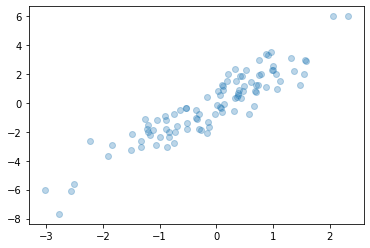

In [52]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3);

## Modifying Values with Fancy Indexing

Fancy indexing it can also be used to modify parts of an array:

In [54]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [55]:
x[i] -= 10 # use any assignment-type operator for this
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

Notice, though, that repeated indices with these operations can cause some potentially unexpected results:

In [56]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Where did the 4 go? The result of this operation is to first assign ``x[0] = 4``, followed by ``x[0] = 6``.
The result, of course, is that ``x[0]`` contains the value 6.

In [57]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

You might expect that ``x[3]`` would contain the value 2, and ``x[4]`` would contain the value 3, as this is how many times each index is repeated. Why is this not the case?

Conceptually, this is because ``x[i] += 1`` is meant as a shorthand of ``x[i] = x[i] + 1``. ``x[i] + 1`` is evaluated, and then the result is assigned to the indices in x.

With this in mind, it is not the augmentation that happens multiple times, but the assignment, which leads to the rather nonintuitive results.

In [59]:
x = np.zeros(10)
np.add.at(x, i, 1)
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

The ``at()`` method does an in-place application of the given operator at the specified indices (here, ``i``) with the specified value (here, 1).
Another method that is similar in spirit is the ``reduceat()`` method of ufuncs, which you can read about in the NumPy documentation.

## Example: Binning Data

You can use these ideas to efficiently bin data to create a histogram by hand.
For example, imagine we have 1,000 values and would like to quickly find where they fall within an array of bins.
We could compute it using ``ufunc.at`` like this:

In [121]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

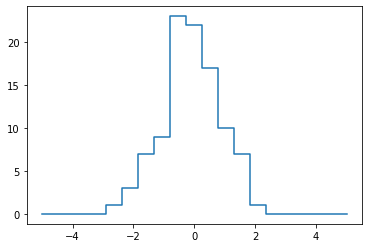

In [131]:
# The counts now reflect the number of points 
# within each bin–in other words, a histogram:
line, = plt.plot(bins, counts);
line.set_drawstyle("steps") 

In [65]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
35.1 µs ± 209 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
18.5 µs ± 405 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Our own one-line algorithm is several times faster than the optimized algorithm in NumPy! How can this be?
If you dig into the ``np.histogram`` source code (you can do this in IPython by typing ``np.histogram??``), you'll see that it's quite a bit more involved than the simple search-and-count that we've done; this is because NumPy's algorithm is more flexible, and particularly is designed for better performance when the number of data points becomes large...

In [66]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
95.9 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
142 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


What this comparison shows is that algorithmic efficiency is almost never a simple question. An algorithm efficient for large datasets will not always be the best choice for small datasets, and vice versa.

The key to efficiently using Python in data-intensive applications is knowing about general convenience routines like ``np.histogram`` and when they're appropriate, but also knowing how to make use of lower-level functionality when you need more pointed behavior.

# Sorting Arrays

Up to this point we have been concerned mainly with tools to access and operate on array data with NumPy.
This section covers algorithms related to sorting values in NumPy arrays.

## Fast Sorting in NumPy: ``np.sort`` and ``np.argsort``

Although Python has built-in ``sort`` and ``sorted`` functions to work with lists, NumPy's ``np.sort`` function turns out to be much more efficient and useful.

To return a sorted version of the array *without modifying the input*, you can use ``np.sort``:

In [70]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [71]:
x

array([2, 1, 4, 3, 5])

A related function is ``argsort``, which instead returns the *indices* of the sorted elements:

In [72]:
i = np.argsort(x)
i

array([1, 0, 3, 2, 4])

The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on.

These indices can then be used (via fancy indexing) to construct the sorted array if desired:

In [73]:
x[i]

array([1, 2, 3, 4, 5])

### Sorting along rows or columns

In [75]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [76]:
np.sort(X, axis=0) # sort each column of X

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [77]:
np.sort(X, axis=1) # sort each row of X

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

Keep in mind that this treats each row or column as an independent array, and any relationships between the row or column values will be lost!

## Partial Sorts: Partitioning

Sometimes we're not interested in sorting the entire array, but simply want to find the *k* smallest values in the array. ``np.partition`` takes an array and a number *K*; the result is a new array with the smallest *K* values to the left of the partition, and the remaining values to the right, in arbitrary order:

In [78]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values.

*Within the two partitions, the elements have arbitrary order.*

Similarly to sorting, we can partition along an arbitrary axis of a multidimensional array:

In [79]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

The result is an array where the first two slots in each row contain the smallest values from that row, with the remaining values filling the remaining slots.

Finally, just as there is a ``np.argsort`` that computes indices of the sort, there is a ``np.argpartition`` that computes indices of the partition.

## Example: k-Nearest Neighbors

Let's quickly see how we might use this ``argsort`` function along multiple axes to find the nearest neighbors of each point in a set.

We'll start by creating a random set of 10 points on a two-dimensional plane:

In [85]:
X = rand.rand(50, 2)

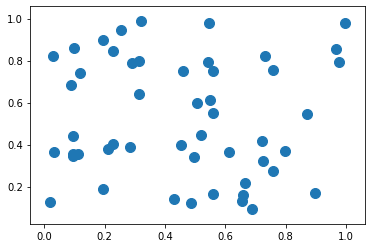

In [86]:
plt.scatter(X[:, 0], X[:, 1], s=100);

In [95]:
# compute the distance between each pair of points
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)
dist_sq.shape, np.all(dist_sq.diagonal() == 0)

((50, 50), True)

With the pairwise square-distances converted, we can now use ``np.argsort`` to sort along each row. 

The leftmost columns will then give the indices of the nearest neighbors:

In [98]:
nearest = np.argsort(dist_sq, axis=1)
nearest[:,0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

Notice that the first column is order because each point's closest neighbor is itself.

If we're simply interested in the nearest $k$ neighbors, all we need is to partition each row so that the smallest $k + 1$ squared distances come first, with larger distances filling the remaining positions of the array:

In [99]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

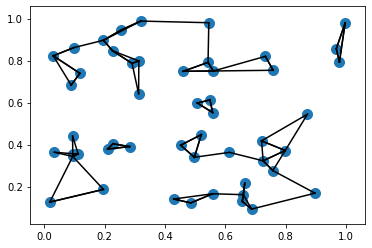

In [104]:
plt.scatter(X[:, 0], X[:, 1], s=100)
K = 2 # draw lines from each point to its two nearest neighbors
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')

At first glance, it might seem strange that some of the points have more than two lines coming out of them: this is due to the fact that if point A is one of the two nearest neighbors of point B, this does not necessarily imply that point B is one of the two nearest neighbors of point A.

You might be tempted to do the same type of operation by manually looping through the data and sorting each set of neighbors individually. The beauty of our approach is that *it's written in a way that's agnostic to the size of the input data*: we could just as easily compute the neighbors among 100 or 1,000,000 points in any number of dimensions, and the code would look the same.